In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
from torchvision import models

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=3972b0a0660f8572f8cce7b65e4c469caf4e8115fe37174bc599f03113e6ca10
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
!wget https://storage.googleapis.com/wandb_datasets/nature_12K.zip

--2021-04-12 05:00:58--  https://storage.googleapis.com/wandb_datasets/nature_12K.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.80, 172.217.164.176, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3816687935 (3.6G) [application/zip]
Saving to: ‘nature_12K.zip’

nature_12K.zip      100%[===================>]   3.55G  41.7MB/s    in 64s     

2021-04-12 05:02:02 (56.5 MB/s) - ‘nature_12K.zip’ saved [3816687935/3816687935]



In [ ]:
!mkdir train_local
!unzip nature_12K.zip -d train_local

Streaming output truncated to the last 5000 lines.
  inflating: train_local/inaturalist_12K/train/Arachnida/1ac25349af662e85f577a31f64beca41.jpg  
  inflating: train_local/inaturalist_12K/train/Arachnida/117ef7f1812725f359500448a258e713.jpg  
  inflating: train_local/inaturalist_12K/train/Arachnida/6409254954c3b46d88d64f0bf4c632fa.jpg  
  inflating: train_local/inaturalist_12K/train/Arachnida/aaed865750bd52944658a7dd23366948.jpg  
  inflating: train_local/inaturalist_12K/train/Arachnida/460cc09ef510d400a4d47a836ddd45e6.jpg  
  inflating: train_local/inaturalist_12K/train/Arachnida/55c48c3afef0b745e53951284cdb2db4.jpg  
  inflating: train_local/inaturalist_12K/train/Arachnida/bff3daa961ee96a37ebe12dc0bcce504.jpg  
  inflating: train_local/inaturalist_12K/train/Arachnida/9082d4f2107bccf1f14d71c8944be607.jpg  
  inflating: train_local/inaturalist_12K/train/Arachnida/93d0130423d42f7c6228150eb95a2a93.jpg  
  inflating: train_local/inaturalist_12K/train/Arachnida/051aba6d7bc324bad76bd438ed3c

In [ ]:
#from google.colab import drive

#drive.mount('/content/gdrive')

In [ ]:
#PATH_OF_DATA= '/content/gdrive/"My Drive"/nature_12K.zip'
#!ls {PATH_OF_DATA}

In [ ]:
transform_train_1 = transforms.Compose([
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

transform_test_1 = transforms.Compose([
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [ ]:
transform_train_2 = transforms.Compose([
    transforms.RandomResizedCrop(299), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

transform_test_2 = transforms.Compose([
    transforms.RandomResizedCrop(299), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [ ]:
#!mkdir train_local
#!unzip /content/gdrive/MyDrive/nature_12K.zip -d train_local

In [ ]:
image_datasets_1 = torchvision.datasets.ImageFolder(root= "/content/train_local/inaturalist_12K/train",  transform=transform_train_1)

In [ ]:
image_datasets_2 = torchvision.datasets.ImageFolder(root= "/content/train_local/inaturalist_12K/train",  transform=transform_train_2)

In [ ]:
classes = ('Amphibia', 'Animalia', 'Arachnida', 'Aves', 'Fungi', 'Insecta', 'Mammalia', 'Mollusca', 'Plantae', 'Reptilia')

In [ ]:
def train_val_dataset(dataset, val_split=0.1):
    train_idx, val_idx = train_test_split(list(range(len(dataset))), test_size=val_split)
    datasets = {}
    datasets['train'] = Subset(dataset, train_idx)
    datasets['val'] = Subset(dataset, val_idx)
    return datasets

In [ ]:
image_datasets_1 = train_val_dataset(image_datasets_1)
image_datasets_2 = train_val_dataset(image_datasets_2)
#test_data= torchvision.datasets.ImageFolder(root= "/content/nature_12K/inaturalist_12K/val",  transform=transform_train)

In [ ]:
X_train_1=image_datasets_1['train']
X_Valid_1=image_datasets_1['val']

X_train_2=image_datasets_2['train']
X_Valid_2=image_datasets_2['val']


In [ ]:
trainloader_1 = torch.utils.data.DataLoader(X_train_1, batch_size=16, shuffle=True)
validationloader_1 = torch.utils.data.DataLoader(X_Valid_1, batch_size=16, shuffle=False)
trainloader_2 = torch.utils.data.DataLoader(X_train_2, batch_size=16, shuffle=True)
validationloader_2 = torch.utils.data.DataLoader(X_Valid_2, batch_size=16, shuffle=False)

In [ ]:
dataiter = iter(trainloader_1)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([128, 3, 224, 224])
torch.Size([3, 224, 224])
3


In [ ]:
!pip install wandb

     |████████████████████████████████| 2.1MB 18.6MB/s 
     |████████████████████████████████| 163kB 56.7MB/s 
     |████████████████████████████████| 102kB 13.6MB/s 
     |████████████████████████████████| 133kB 49.7MB/s 
     |████████████████████████████████| 71kB 10.5MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=852ed85daea8125eef330c05efb900764900b5d89a9f01aad4092a5e81004bff
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=56402f61762c5da8e356ab80f1e932ff6c5f90dbedf6b4118d7cd689e09b95a8
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built subprocess32 pathtools


In [ ]:


import wandb
!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
!pip install googlenet_pytorch

In [ ]:

from googlenet_pytorch import GoogLeNet

In [ ]:
def Evaluation(dataloader,model):
  total,correct=0,0
  for data in dataloader:
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    outputs=model(inputs)
    _,pred=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(pred==labels).sum().item()
  return 100*correct/total





#InceptionResNetV2 Model Initialization

In [ ]:
import torch.utils.model_zoo as model_zoo


In [ ]:
def inceptionresnetv2(num_classes=10, loss='softmax', pretrained=True, **kwargs):
    model = InceptionResNetV2(num_classes=num_classes, loss=loss, **kwargs)
    if pretrained:
        model.load_imagenet_weights()
    return model

In [ ]:
"""
Code imported from https://github.com/Cadene/pretrained-models.pytorch
"""
from __future__ import division, absolute_import
import torch
import torch.nn as nn
import torch.utils.model_zoo as model_zoo

__all__ = ['inceptionresnetv2']

pretrained_settings = {
    'inceptionresnetv2': {
        'imagenet': {
            'url':
            'http://data.lip6.fr/cadene/pretrainedmodels/inceptionresnetv2-520b38e4.pth',
            'input_space': 'RGB',
            'input_size': [3, 299, 299],
            'input_range': [0, 1],
            'mean': [0.5, 0.5, 0.5],
            'std': [0.5, 0.5, 0.5],
            'num_classes': 1000
        },
        'imagenet+background': {
            'url':
            'http://data.lip6.fr/cadene/pretrainedmodels/inceptionresnetv2-520b38e4.pth',
            'input_space': 'RGB',
            'input_size': [3, 299, 299],
            'input_range': [0, 1],
            'mean': [0.5, 0.5, 0.5],
            'std': [0.5, 0.5, 0.5],
            'num_classes': 1001
        }
    }
}


class BasicConv2d(nn.Module):

    def __init__(self, in_planes, out_planes, kernel_size, stride, padding=0):
        super(BasicConv2d, self).__init__()
        self.conv = nn.Conv2d(
            in_planes,
            out_planes,
            kernel_size=kernel_size,
            stride=stride,
            padding=padding,
            bias=False
        ) # verify bias false
        self.bn = nn.BatchNorm2d(
            out_planes,
            eps=0.001, # value found in tensorflow
            momentum=0.1, # default pytorch value
            affine=True
        )
        self.relu = nn.ReLU(inplace=False)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        return x


class Mixed_5b(nn.Module):

    def __init__(self):
        super(Mixed_5b, self).__init__()

        self.branch0 = BasicConv2d(192, 96, kernel_size=1, stride=1)

        self.branch1 = nn.Sequential(
            BasicConv2d(192, 48, kernel_size=1, stride=1),
            BasicConv2d(48, 64, kernel_size=5, stride=1, padding=2)
        )

        self.branch2 = nn.Sequential(
            BasicConv2d(192, 64, kernel_size=1, stride=1),
            BasicConv2d(64, 96, kernel_size=3, stride=1, padding=1),
            BasicConv2d(96, 96, kernel_size=3, stride=1, padding=1)
        )

        self.branch3 = nn.Sequential(
            nn.AvgPool2d(3, stride=1, padding=1, count_include_pad=False),
            BasicConv2d(192, 64, kernel_size=1, stride=1)
        )

    def forward(self, x):
        x0 = self.branch0(x)
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        out = torch.cat((x0, x1, x2, x3), 1)
        return out


class Block35(nn.Module):

    def __init__(self, scale=1.0):
        super(Block35, self).__init__()

        self.scale = scale

        self.branch0 = BasicConv2d(320, 32, kernel_size=1, stride=1)

        self.branch1 = nn.Sequential(
            BasicConv2d(320, 32, kernel_size=1, stride=1),
            BasicConv2d(32, 32, kernel_size=3, stride=1, padding=1)
        )

        self.branch2 = nn.Sequential(
            BasicConv2d(320, 32, kernel_size=1, stride=1),
            BasicConv2d(32, 48, kernel_size=3, stride=1, padding=1),
            BasicConv2d(48, 64, kernel_size=3, stride=1, padding=1)
        )

        self.conv2d = nn.Conv2d(128, 320, kernel_size=1, stride=1)
        self.relu = nn.ReLU(inplace=False)

    def forward(self, x):
        x0 = self.branch0(x)
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        out = torch.cat((x0, x1, x2), 1)
        out = self.conv2d(out)
        out = out * self.scale + x
        out = self.relu(out)
        return out


class Mixed_6a(nn.Module):

    def __init__(self):
        super(Mixed_6a, self).__init__()

        self.branch0 = BasicConv2d(320, 384, kernel_size=3, stride=2)

        self.branch1 = nn.Sequential(
            BasicConv2d(320, 256, kernel_size=1, stride=1),
            BasicConv2d(256, 256, kernel_size=3, stride=1, padding=1),
            BasicConv2d(256, 384, kernel_size=3, stride=2)
        )

        self.branch2 = nn.MaxPool2d(3, stride=2)

    def forward(self, x):
        x0 = self.branch0(x)
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        out = torch.cat((x0, x1, x2), 1)
        return out


class Block17(nn.Module):

    def __init__(self, scale=1.0):
        super(Block17, self).__init__()

        self.scale = scale

        self.branch0 = BasicConv2d(1088, 192, kernel_size=1, stride=1)

        self.branch1 = nn.Sequential(
            BasicConv2d(1088, 128, kernel_size=1, stride=1),
            BasicConv2d(
                128, 160, kernel_size=(1, 7), stride=1, padding=(0, 3)
            ),
            BasicConv2d(
                160, 192, kernel_size=(7, 1), stride=1, padding=(3, 0)
            )
        )

        self.conv2d = nn.Conv2d(384, 1088, kernel_size=1, stride=1)
        self.relu = nn.ReLU(inplace=False)

    def forward(self, x):
        x0 = self.branch0(x)
        x1 = self.branch1(x)
        out = torch.cat((x0, x1), 1)
        out = self.conv2d(out)
        out = out * self.scale + x
        out = self.relu(out)
        return out


class Mixed_7a(nn.Module):

    def __init__(self):
        super(Mixed_7a, self).__init__()

        self.branch0 = nn.Sequential(
            BasicConv2d(1088, 256, kernel_size=1, stride=1),
            BasicConv2d(256, 384, kernel_size=3, stride=2)
        )

        self.branch1 = nn.Sequential(
            BasicConv2d(1088, 256, kernel_size=1, stride=1),
            BasicConv2d(256, 288, kernel_size=3, stride=2)
        )

        self.branch2 = nn.Sequential(
            BasicConv2d(1088, 256, kernel_size=1, stride=1),
            BasicConv2d(256, 288, kernel_size=3, stride=1, padding=1),
            BasicConv2d(288, 320, kernel_size=3, stride=2)
        )

        self.branch3 = nn.MaxPool2d(3, stride=2)

    def forward(self, x):
        x0 = self.branch0(x)
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        out = torch.cat((x0, x1, x2, x3), 1)
        return out


class Block8(nn.Module):

    def __init__(self, scale=1.0, noReLU=False):
        super(Block8, self).__init__()

        self.scale = scale
        self.noReLU = noReLU

        self.branch0 = BasicConv2d(2080, 192, kernel_size=1, stride=1)

        self.branch1 = nn.Sequential(
            BasicConv2d(2080, 192, kernel_size=1, stride=1),
            BasicConv2d(
                192, 224, kernel_size=(1, 3), stride=1, padding=(0, 1)
            ),
            BasicConv2d(
                224, 256, kernel_size=(3, 1), stride=1, padding=(1, 0)
            )
        )

        self.conv2d = nn.Conv2d(448, 2080, kernel_size=1, stride=1)
        if not self.noReLU:
            self.relu = nn.ReLU(inplace=False)

    def forward(self, x):
        x0 = self.branch0(x)
        x1 = self.branch1(x)
        out = torch.cat((x0, x1), 1)
        out = self.conv2d(out)
        out = out * self.scale + x
        if not self.noReLU:
            out = self.relu(out)
        return out


# ----------------
# Model Definition
# ----------------
class InceptionResNetV2(nn.Module):
    """Inception-ResNet-V2.

    Reference:
        Szegedy et al. Inception-v4, Inception-ResNet and the Impact of Residual
        Connections on Learning. AAAI 2017.

    Public keys:
        - ``inceptionresnetv2``: Inception-ResNet-V2.
    """

    def __init__(self, num_classes, loss='softmax', **kwargs):
        super(InceptionResNetV2, self).__init__()
        self.loss = loss

        # Modules
        self.conv2d_1a = BasicConv2d(3, 32, kernel_size=3, stride=2)
        self.conv2d_2a = BasicConv2d(32, 32, kernel_size=3, stride=1)
        self.conv2d_2b = BasicConv2d(
            32, 64, kernel_size=3, stride=1, padding=1
        )
        self.maxpool_3a = nn.MaxPool2d(3, stride=2)
        self.conv2d_3b = BasicConv2d(64, 80, kernel_size=1, stride=1)
        self.conv2d_4a = BasicConv2d(80, 192, kernel_size=3, stride=1)
        self.maxpool_5a = nn.MaxPool2d(3, stride=2)
        self.mixed_5b = Mixed_5b()
        self.repeat = nn.Sequential(
            Block35(scale=0.17), Block35(scale=0.17), Block35(scale=0.17),
            Block35(scale=0.17), Block35(scale=0.17), Block35(scale=0.17),
            Block35(scale=0.17), Block35(scale=0.17), Block35(scale=0.17),
            Block35(scale=0.17)
        )
        self.mixed_6a = Mixed_6a()
        self.repeat_1 = nn.Sequential(
            Block17(scale=0.10), Block17(scale=0.10), Block17(scale=0.10),
            Block17(scale=0.10), Block17(scale=0.10), Block17(scale=0.10),
            Block17(scale=0.10), Block17(scale=0.10), Block17(scale=0.10),
            Block17(scale=0.10), Block17(scale=0.10), Block17(scale=0.10),
            Block17(scale=0.10), Block17(scale=0.10), Block17(scale=0.10),
            Block17(scale=0.10), Block17(scale=0.10), Block17(scale=0.10),
            Block17(scale=0.10), Block17(scale=0.10)
        )
        self.mixed_7a = Mixed_7a()
        self.repeat_2 = nn.Sequential(
            Block8(scale=0.20), Block8(scale=0.20), Block8(scale=0.20),
            Block8(scale=0.20), Block8(scale=0.20), Block8(scale=0.20),
            Block8(scale=0.20), Block8(scale=0.20), Block8(scale=0.20)
        )

        self.block8 = Block8(noReLU=True)
        self.conv2d_7b = BasicConv2d(2080, 1536, kernel_size=1, stride=1)
        self.global_avgpool = nn.AdaptiveAvgPool2d(1)
        self.classifier = nn.Linear(1536, num_classes)

    def load_imagenet_weights(self):
        settings = pretrained_settings['inceptionresnetv2']['imagenet']
        pretrain_dict = model_zoo.load_url(settings['url'])
        model_dict = self.state_dict()
        pretrain_dict = {
            k: v
            for k, v in pretrain_dict.items()
            if k in model_dict and model_dict[k].size() == v.size()
        }
        model_dict.update(pretrain_dict)
        self.load_state_dict(model_dict)

    def featuremaps(self, x):
        x = self.conv2d_1a(x)
        x = self.conv2d_2a(x)
        x = self.conv2d_2b(x)
        x = self.maxpool_3a(x)
        x = self.conv2d_3b(x)
        x = self.conv2d_4a(x)
        x = self.maxpool_5a(x)
        x = self.mixed_5b(x)
        x = self.repeat(x)
        x = self.mixed_6a(x)
        x = self.repeat_1(x)
        x = self.mixed_7a(x)
        x = self.repeat_2(x)
        x = self.block8(x)
        x = self.conv2d_7b(x)
        return x

    def forward(self, x):
        f = self.featuremaps(x)
        v = self.global_avgpool(f)
        v = v.view(v.size(0), -1)

        if not self.training:
            return v

        y = self.classifier(v)

        if self.loss == 'softmax':
            return y
        elif self.loss == 'triplet':
            return y, v
        else:
            raise KeyError('Unsupported loss: {}'.format(self.loss))



def inceptionresnetv2(num_classes=10, loss='softmax', pretrained=True, **kwargs):
    model = InceptionResNetV2(num_classes=num_classes, loss=loss, **kwargs)
    if pretrained:
        model.load_imagenet_weights()
    return model

In [ ]:
def Evaluation(dataloader,model):
  total,correct=0,0
  for data in dataloader:
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    outputs=model(inputs)
    _,pred=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(pred==labels).sum().item()
  return 100*correct/total





#Fit Funtion for Wandb


In [ ]:
import torch.optim as optim

In [ ]:
def fit(model_type,Freezing_type,layer_number):
  
  loss_epoch_arr=[]
  max_epochs=6
  batch_size=16
  num_classes=10
  k=layer_number
  n_iter=np.ceil(8999/batch_size)
  min_loss=1000
  loss_valid_epoch_arr=[]

  if (model_type=='Resnet50'):
    #print(device)
    model1=models.resnet50(pretrained=True)
    for param in model1.parameters():
      param.requires_grad=False

    final_in_features=model1.fc.in_features
    model1.fc=nn.Linear(final_in_features,num_classes)

    if (Freezing_type=='Activating last k layers'):
      k=k+3
      ct = 0
      for child in model1.children():
        ct += 1
        if ct > k:
          for param in child.parameters():
            param.requires_grad = True
        #    print(param.requires_grad,ct)
    if (Freezing_type=='Activating first k layers'):
      k=k+2
      ct = 0
      for child in model1.children():
        ct += 1
        if ct < k:
          for param in child.parameters():
            param.requires_grad = True
          #  print(param.requires_grad,ct)
    model1=model1.to(device)
    
    loss_fn=nn.CrossEntropyLoss()
    opt=optim.SGD(model1.parameters(),lr=0.001,momentum=0.9)

  elif (model_type=='Inception_V3'):
  
    model1=models.inception_v3(pretrained=True)
    #model1=model1.to(device)
    loss_fn=nn.CrossEntropyLoss()
    opt=optim.SGD(model1.parameters(),lr=0.001,momentum=0.9)

    model1.aux_logits=False
    for param in model1.parameters():
      param.requires_grad=False
    if (Freezing_type=='Activating last k layers'):
      k=k+14
      ct = 0
      for child in model1.children():
        ct += 1
        if ct > k:
          for param in child.parameters():
            param.requires_grad = True
           # print(param.requires_grad,ct)
    if (Freezing_type=='Activating first k layers'):
      k=k+2
      ct = 0
      for child in model1.children():
        ct += 1
        if ct < k:
          for param in child.parameters():
            param.requires_grad = True
         #   print(param.requires_grad,ct)

    final_in_features=model1.fc.in_features
    model1.fc=nn.Linear(final_in_features,num_classes)

    model1=model1.to(device)
    
    loss_fn=nn.CrossEntropyLoss()
    opt=optim.SGD(model1.parameters(),lr=0.001,momentum=0.9)


  elif (model_type=='Inception_Resnet_V2'):

    model1=inceptionresnetv2(pretrained=True)
    #model1=model1.to(device)
    loss_fn=nn.CrossEntropyLoss()
    opt=optim.SGD(model1.parameters(),lr=0.001,momentum=0.9)

    model1.aux_logits=False
    for param in model1.parameters():
      param.requires_grad=False
    if (Freezing_type=='Activating last k layers'):

      k=10+k
      ct = 0
      for child in model1.children():
        ct += 1
        if ct > k:
          for param in child.parameters():
            param.requires_grad = True
          #  print(param.requires_grad,ct)
    if (Freezing_type=='Activating first k layers'):
      k=k+2
      ct = 0
      for child in model1.children():
        ct += 1
        if ct < k:
          for param in child.parameters():
            param.requires_grad = True
           # print(param.requires_grad,ct)

    final_in_features=model1.classifier.in_features
    model1.classifier=nn.Linear(final_in_features,num_classes)
    model1=model1.to(device)
    
    loss_fn=nn.CrossEntropyLoss()
    opt=optim.SGD(model1.parameters(),lr=0.001,momentum=0.9)

  elif (model_type=='GoogleNet'):

    model1 = GoogLeNet.from_pretrained('googlenet')
    model1.aux_logits=False
    #model1=model1.to(device)
    loss_fn=nn.CrossEntropyLoss()
    opt=optim.SGD(model1.parameters(),lr=0.001,momentum=0.9)

    for param in model1.parameters():
      param.requires_grad=False
    if (Freezing_type=='Activating last k layers'):
      k=13+k
      ct = 0
      for child in model1.children():
        ct += 1
        if ct > k:
          for param in child.parameters():
            param.requires_grad = True
          #  print(param.requires_grad,ct)
    if (Freezing_type=='Activating first k layers'):
      k=3+k
      ct = 0
      for child in model1.children():
        ct += 1
        if ct < k:
          for param in child.parameters():
            param.requires_grad = True
            #print(param.requires_grad,ct)
      
    final_in_features=model1.fc.in_features
    model1.fc=nn.Linear(final_in_features,num_classes)
    model1=model1.to(device)
    
    loss_fn=nn.CrossEntropyLoss()
    opt=optim.SGD(model1.parameters(),lr=0.001,momentum=0.9)

  

  
  if (model_type=='GoogleNet' or model_type=='Resnet50'):
    trainloader=trainloader_1
    validationloader=validationloader_1

  elif (model_type=='Inception_Resnet_V2' or model_type=='Inception_V3'):


    trainloader=trainloader_2
    validationloader=validationloader_2
  







  for epoch in range(max_epochs):
    for i,data in enumerate(trainloader,0):
      #print(device)
      inputs,labels=data
      inputs,labels=inputs.to(device),labels.to(device)
      #device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
      #print(device)
      opt.zero_grad()

      outputs=model1(inputs) #forwrd_pass
      loss=loss_fn(outputs,labels)
      loss.backward()
      opt.step() #Update the parameter after the backward paas using opt optimiser
      #if(min_loss>loss.item()):
       # min_loss=loss.item()
        #best_model=copy.deepcopy(model1.state_dict())
        #print("Min Loss is %.2f" % min_loss)
  
      del inputs,labels,outputs
      torch.cuda.empty_cache()
  
      if(i%100==0):
        print("Iteration : %d%d , Loss:%0.2f " %(i,n_iter,loss.item()))


    for i,data1 in enumerate(validationloader,0):
      inputs_Val,labels_Val=data1
      inputs_Val,labels_Val=inputs_Val.to(device),labels_Val.to(device)
      outputs_val=model1(inputs_Val) #forwrd_pass
      loss_val=loss_fn(outputs_val,labels_Val)
      del inputs_Val,labels_Val,outputs_val
      torch.cuda.empty_cache()

  
  
  
    
     # loss_arr.append(loss.item())
    loss_valid_epoch_arr.append(loss_val.item()) 
    loss_epoch_arr.append(loss.item())
    wandb.log({
          "Epoch":epoch,
          "Train loss":loss_epoch_arr[epoch],
          "validation loss":loss_valid_epoch_arr[epoch],
          "Validation Acc":Evaluation(validationloader,model1),
     })
  
    print("epoch: %d/%d,Validation_acc:%.2f" % (epoch,max_epochs,Evaluation(validationloader,model1)))
  
  
  plt.plot(loss_epoch_arr)
  plt.show()
  del model1
  torch.cuda.empty_cache()
  
    
  
  

In [ ]:
wandb.init(project="tem10",
           config={
              "model_type":'Resnet50',
              "Freezing_type":'Activating last k layers',
              "layer_number":3
           }
           )

wandb: Currently logged in as: siddharth (use `wandb login --relogin` to force relogin)


In [ ]:
import copy

In [ ]:
torch.cuda.empty_cache()

In [ ]:
fit(model_type='Resnet50',Freezing_type='Activating first k layers',layer_number=3)

In [ ]:
hyperparameter_defaults= {
              "model_type":'Resnet50',
              "Freezing_type":'Activating last k layers',
              "layer_number":3
}

In [ ]:
sweep_config={
    "name":"Assignment2Q3_final",
    "method":"grid",
    "metric":{
        'name':'accuracy',
        'goal' : 'maximize'
    },
    "parameters":{
      "model_type":{
          "values":['Resnet50','GoogleNet','Inception_Resnet_V2','Inception_V3']
      },
      "Freezing_type":{
          "values":['Activating first k layers','Activating last k layers','Activating last layers']
      },
      "layer_number":{
          "values":[3]
      }

    }
}

In [ ]:
sweep_id1=wandb.sweep(sweep_config,entity="siddharth",project="Assignment2Q3_final")

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: i2h94v91
Sweep URL: https://wandb.ai/siddharth/Assignment2Q3_final/sweeps/i2h94v91


In [ ]:
def train():
  wandb.init(config=hyperparameter_defaults)
  config=wandb.config
  fit(config.model_type,config.Freezing_type,config.layer_number)
   #change


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: Agent Starting Run: 43ovwxpj with config:
wandb: 	Freezing_type: Activating first k layers
wandb: 	layer_number: 3
wandb: 	model_type: Resnet50


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth



Iteration : 0563 , Loss:2.36 
Iteration : 100563 , Loss:1.46 
Iteration : 200563 , Loss:1.08 
Iteration : 300563 , Loss:1.01 
Iteration : 400563 , Loss:0.82 
Iteration : 500563 , Loss:0.75 
epoch: 0/6,Validation_acc:68.70
Iteration : 0563 , Loss:0.72 
Iteration : 100563 , Loss:0.84 
Iteration : 200563 , Loss:1.04 
Iteration : 300563 , Loss:1.07 
Iteration : 400563 , Loss:0.58 
Iteration : 500563 , Loss:1.14 
epoch: 1/6,Validation_acc:69.90
Iteration : 0563 , Loss:0.82 
Iteration : 100563 , Loss:0.69 
Iteration : 200563 , Loss:0.60 
Iteration : 300563 , Loss:0.49 
Iteration : 400563 , Loss:0.75 
Iteration : 500563 , Loss:1.07 
epoch: 2/6,Validation_acc:72.80
Iteration : 0563 , Loss:1.34 
Iteration : 100563 , Loss:0.55 
Iteration : 200563 , Loss:0.59 
Iteration : 300563 , Loss:0.62 
Iteration : 400563 , Loss:0.71 
Iteration : 500563 , Loss:0.79 
epoch: 3/6,Validation_acc:71.80
Iteration : 0563 , Loss:0.69 
Iteration : 100563 , Loss:0.43 
Iteration : 200563 , Loss:1.03 
Iteration : 30056

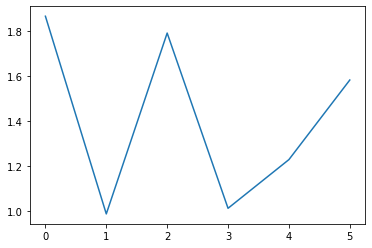

Epoch,5
Train loss,1.5833
validation loss,0.84496
Validation Acc,72.7
_runtime,1501
_timestamp,1618171934
_step,5


Epoch,▁▂▄▅▇█
Train loss,█▁▇▁▃▆
validation loss,▇▄▅▃█▁
Validation Acc,▁▄▃▆▃█
_runtime,▁▂▄▅▇█
_timestamp,▁▂▄▅▇█
_step,▁▂▄▅▇█


wandb: Agent Starting Run: hb616edh with config:
wandb: 	Freezing_type: Activating first k layers
wandb: 	layer_number: 3
wandb: 	model_type: GoogleNet


Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth



Loaded pretrained weights for googlenet
Iteration : 0563 , Loss:2.25 
Iteration : 100563 , Loss:1.76 
Iteration : 200563 , Loss:1.56 
Iteration : 300563 , Loss:1.58 
Iteration : 400563 , Loss:1.23 
Iteration : 500563 , Loss:1.36 
epoch: 0/6,Validation_acc:63.10
Iteration : 0563 , Loss:1.06 
Iteration : 100563 , Loss:1.36 
Iteration : 200563 , Loss:1.19 
Iteration : 300563 , Loss:1.22 
Iteration : 400563 , Loss:1.26 
Iteration : 500563 , Loss:1.23 
epoch: 1/6,Validation_acc:65.80
Iteration : 0563 , Loss:1.10 
Iteration : 100563 , Loss:1.10 
Iteration : 200563 , Loss:0.78 
Iteration : 300563 , Loss:1.50 
Iteration : 400563 , Loss:1.58 
Iteration : 500563 , Loss:0.89 
epoch: 2/6,Validation_acc:67.30
Iteration : 0563 , Loss:1.35 
Iteration : 100563 , Loss:1.08 
Iteration : 200563 , Loss:0.96 
Iteration : 300563 , Loss:0.82 
Iteration : 400563 , Loss:0.77 
Iteration : 500563 , Loss:1.51 
epoch: 3/6,Validation_acc:63.50
Iteration : 0563 , Loss:1.31 
Iteration : 100563 , Loss:0.79 
Iteration

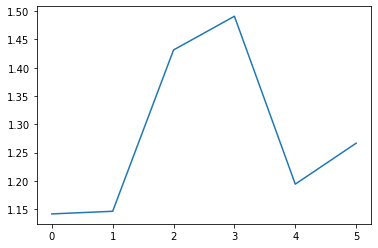

Epoch,5
Train loss,1.26661
validation loss,1.80186
Validation Acc,68.4
_runtime,1288
_timestamp,1618173252
_step,5


Epoch,▁▂▄▅▇█
Train loss,▁▁▇█▂▄
validation loss,▃▃▃▇▁█
Validation Acc,▁▂▄█▅█
_runtime,▁▂▄▅▇█
_timestamp,▁▂▄▅▇█
_step,▁▂▄▅▇█


wandb: Agent Starting Run: 55ef3scg with config:
wandb: 	Freezing_type: Activating first k layers
wandb: 	layer_number: 3
wandb: 	model_type: Inception_Resnet_V2


Downloading: "http://data.lip6.fr/cadene/pretrainedmodels/inceptionresnetv2-520b38e4.pth" to /root/.cache/torch/hub/checkpoints/inceptionresnetv2-520b38e4.pth



Iteration : 0563 , Loss:2.41 
Iteration : 100563 , Loss:1.88 
Iteration : 200563 , Loss:1.35 
Iteration : 300563 , Loss:1.19 
Iteration : 400563 , Loss:0.78 
Iteration : 500563 , Loss:0.83 
epoch: 0/6,Validation_acc:72.80
Iteration : 0563 , Loss:0.89 
Iteration : 100563 , Loss:0.73 
Iteration : 200563 , Loss:0.56 
Iteration : 300563 , Loss:0.95 
Iteration : 400563 , Loss:0.63 
Iteration : 500563 , Loss:0.76 
epoch: 1/6,Validation_acc:74.90
Iteration : 0563 , Loss:0.90 
Iteration : 100563 , Loss:0.88 
Iteration : 200563 , Loss:0.53 
Iteration : 300563 , Loss:1.01 
Iteration : 400563 , Loss:0.61 
Iteration : 500563 , Loss:0.95 
epoch: 2/6,Validation_acc:75.50
Iteration : 0563 , Loss:0.86 
Iteration : 100563 , Loss:0.86 
Iteration : 200563 , Loss:0.92 
Iteration : 300563 , Loss:0.34 
Iteration : 400563 , Loss:1.07 
Iteration : 500563 , Loss:0.83 
epoch: 3/6,Validation_acc:76.70
Iteration : 0563 , Loss:0.60 
Iteration : 100563 , Loss:1.12 
Iteration : 200563 , Loss:0.49 
Iteration : 30056

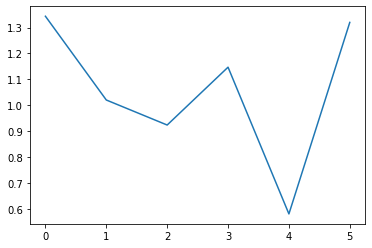

Epoch,5
Train loss,1.31988
validation loss,0.89139
Validation Acc,77.0
_runtime,3212
_timestamp,1618176488
_step,5


Epoch,▁▂▄▅▇█
Train loss,█▅▄▆▁█
validation loss,▃▄▁▆█▁
Validation Acc,▁▄██▆▇
_runtime,▁▂▄▅▇█
_timestamp,▁▂▄▅▇█
_step,▁▂▄▅▇█


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 670uqhir with config:
wandb: 	Freezing_type: Activating first k layers
wandb: 	layer_number: 3
wandb: 	model_type: Inception_V3


Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth



Iteration : 0563 , Loss:2.28 
Iteration : 100563 , Loss:1.76 
Iteration : 200563 , Loss:1.43 
Iteration : 300563 , Loss:1.24 
Iteration : 400563 , Loss:0.84 
Iteration : 500563 , Loss:0.97 
epoch: 0/6,Validation_acc:66.30
Iteration : 0563 , Loss:1.15 
Iteration : 100563 , Loss:1.04 
Iteration : 200563 , Loss:1.05 
Iteration : 300563 , Loss:1.39 
Iteration : 400563 , Loss:1.27 
Iteration : 500563 , Loss:0.81 
epoch: 1/6,Validation_acc:66.20
Iteration : 0563 , Loss:0.83 
Iteration : 100563 , Loss:0.80 
Iteration : 200563 , Loss:1.59 
Iteration : 300563 , Loss:0.77 
Iteration : 400563 , Loss:0.81 
Iteration : 500563 , Loss:0.54 
epoch: 2/6,Validation_acc:67.00
Iteration : 0563 , Loss:1.47 
Iteration : 100563 , Loss:1.17 
Iteration : 200563 , Loss:1.16 
Iteration : 300563 , Loss:0.73 
Iteration : 400563 , Loss:1.01 
Iteration : 500563 , Loss:0.81 
epoch: 3/6,Validation_acc:66.00
Iteration : 0563 , Loss:1.08 
Iteration : 100563 , Loss:1.01 
Iteration : 200563 , Loss:1.09 
Iteration : 30056

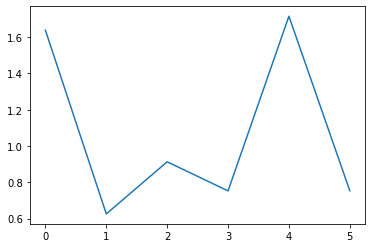

Epoch,5
Train loss,0.75396
validation loss,1.48015
Validation Acc,69.6
_runtime,1713
_timestamp,1618178254
_step,5


Epoch,▁▂▄▅▇█
Train loss,█▁▃▂█▂
validation loss,▇▁█▄▅▆
Validation Acc,▂▁▁▁▄█
_runtime,▁▂▄▅▇█
_timestamp,▁▂▄▅▇█
_step,▁▂▄▅▇█


wandb: Agent Starting Run: 070c8bii with config:
wandb: 	Freezing_type: Activating last k layers
wandb: 	layer_number: 3
wandb: 	model_type: Resnet50


Iteration : 0563 , Loss:2.34 
Iteration : 100563 , Loss:0.92 
Iteration : 200563 , Loss:0.57 
Iteration : 300563 , Loss:0.78 
Iteration : 400563 , Loss:1.09 
Iteration : 500563 , Loss:0.30 
epoch: 0/6,Validation_acc:73.80
Iteration : 0563 , Loss:1.24 
Iteration : 100563 , Loss:1.07 
Iteration : 200563 , Loss:0.46 
Iteration : 300563 , Loss:0.41 
Iteration : 400563 , Loss:0.99 
Iteration : 500563 , Loss:0.40 
epoch: 1/6,Validation_acc:74.30
Iteration : 0563 , Loss:0.69 
Iteration : 100563 , Loss:1.31 
Iteration : 200563 , Loss:0.38 
Iteration : 300563 , Loss:0.73 
Iteration : 400563 , Loss:1.21 
Iteration : 500563 , Loss:0.74 
epoch: 2/6,Validation_acc:74.10
Iteration : 0563 , Loss:0.67 
Iteration : 100563 , Loss:0.73 
Iteration : 200563 , Loss:0.48 
Iteration : 300563 , Loss:0.23 
Iteration : 400563 , Loss:1.14 
Iteration : 500563 , Loss:0.18 
epoch: 3/6,Validation_acc:76.80
Iteration : 0563 , Loss:0.45 
Iteration : 100563 , Loss:0.33 
Iteration : 200563 , Loss:0.62 
Iteration : 300563

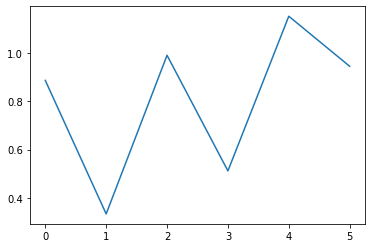

Epoch,5
Train loss,0.94568
validation loss,0.6455
Validation Acc,73.8
_runtime,1429
_timestamp,1618179713
_step,5


Epoch,▁▂▄▅▇█
Train loss,▆▁▇▃█▆
validation loss,█▅▄▆▃▁
Validation Acc,▃▄▃█▇▁
_runtime,▁▂▄▅▇█
_timestamp,▁▂▄▅▇█
_step,▁▂▄▅▇█


wandb: Agent Starting Run: faqqib8h with config:
wandb: 	Freezing_type: Activating last k layers
wandb: 	layer_number: 3
wandb: 	model_type: GoogleNet


Loaded pretrained weights for googlenet
Iteration : 0563 , Loss:2.33 
Iteration : 100563 , Loss:1.75 
Iteration : 200563 , Loss:1.68 
Iteration : 300563 , Loss:1.04 
Iteration : 400563 , Loss:1.19 
Iteration : 500563 , Loss:1.20 
epoch: 0/6,Validation_acc:61.90
Iteration : 0563 , Loss:1.30 
Iteration : 100563 , Loss:1.07 
Iteration : 200563 , Loss:1.44 
Iteration : 300563 , Loss:0.64 
Iteration : 400563 , Loss:0.87 
Iteration : 500563 , Loss:1.30 
epoch: 1/6,Validation_acc:64.50
Iteration : 0563 , Loss:1.05 
Iteration : 100563 , Loss:0.87 
Iteration : 200563 , Loss:1.55 
Iteration : 300563 , Loss:0.89 
Iteration : 400563 , Loss:1.05 
Iteration : 500563 , Loss:1.08 
epoch: 2/6,Validation_acc:66.80
Iteration : 0563 , Loss:1.35 
Iteration : 100563 , Loss:1.21 
Iteration : 200563 , Loss:1.17 
Iteration : 300563 , Loss:1.31 
Iteration : 400563 , Loss:0.91 
Iteration : 500563 , Loss:0.87 
epoch: 3/6,Validation_acc:66.40
Iteration : 0563 , Loss:0.87 
Iteration : 100563 , Loss:0.89 
Iteration 

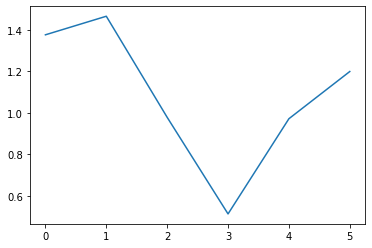

Epoch,5
Train loss,1.19972
validation loss,1.35465
Validation Acc,65.0
_runtime,1156
_timestamp,1618180895
_step,5


Epoch,▁▂▄▅▇█
Train loss,▇█▄▁▄▆
validation loss,▁▁▃▁█▁
Validation Acc,▁▄█▇▆▃
_runtime,▁▂▄▅▇█
_timestamp,▁▂▄▅▇█
_step,▁▂▄▅▇█


wandb: Agent Starting Run: c1gez50t with config:
wandb: 	Freezing_type: Activating last k layers
wandb: 	layer_number: 3
wandb: 	model_type: Inception_Resnet_V2


Iteration : 0563 , Loss:2.32 
Iteration : 100563 , Loss:1.42 
Iteration : 200563 , Loss:1.20 
Iteration : 300563 , Loss:1.18 
Iteration : 400563 , Loss:0.85 
Iteration : 500563 , Loss:0.88 
epoch: 0/6,Validation_acc:74.90
Iteration : 0563 , Loss:1.52 
Iteration : 100563 , Loss:0.64 
Iteration : 200563 , Loss:1.04 
Iteration : 300563 , Loss:0.78 
Iteration : 400563 , Loss:0.56 
Iteration : 500563 , Loss:0.86 
epoch: 1/6,Validation_acc:77.20
Iteration : 0563 , Loss:0.68 
Iteration : 100563 , Loss:0.97 
Iteration : 200563 , Loss:0.60 
Iteration : 300563 , Loss:0.44 
Iteration : 400563 , Loss:0.59 
Iteration : 500563 , Loss:0.80 
epoch: 2/6,Validation_acc:76.30
Iteration : 0563 , Loss:0.49 
Iteration : 100563 , Loss:0.94 
Iteration : 200563 , Loss:1.22 
Iteration : 300563 , Loss:0.78 
Iteration : 400563 , Loss:0.60 
Iteration : 500563 , Loss:0.89 
epoch: 3/6,Validation_acc:76.30
Iteration : 0563 , Loss:0.77 
Iteration : 100563 , Loss:0.43 
Iteration : 200563 , Loss:0.65 
Iteration : 300563

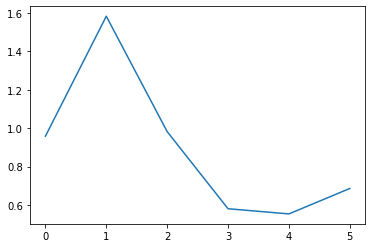

Epoch,5
Train loss,0.6858
validation loss,1.03402
Validation Acc,77.3
_runtime,1880
_timestamp,1618182799
_step,5


Epoch,▁▂▄▅▇█
Train loss,▄█▄▁▁▂
validation loss,▃█▁▄▃▅
Validation Acc,▅▄▃▁▆█
_runtime,▁▂▄▅▇█
_timestamp,▁▂▄▅▇█
_step,▁▂▄▅▇█


wandb: Agent Starting Run: jbjl8sox with config:
wandb: 	Freezing_type: Activating last k layers
wandb: 	layer_number: 3
wandb: 	model_type: Inception_V3


Iteration : 0563 , Loss:2.35 
Iteration : 100563 , Loss:1.35 
Iteration : 200563 , Loss:0.97 
Iteration : 300563 , Loss:1.36 
Iteration : 400563 , Loss:0.62 
Iteration : 500563 , Loss:0.82 
epoch: 0/6,Validation_acc:71.00
Iteration : 0563 , Loss:0.78 
Iteration : 100563 , Loss:0.86 
Iteration : 200563 , Loss:0.42 
Iteration : 300563 , Loss:1.03 
Iteration : 400563 , Loss:0.94 
Iteration : 500563 , Loss:0.74 
epoch: 1/6,Validation_acc:73.60
Iteration : 0563 , Loss:0.54 
Iteration : 100563 , Loss:1.15 
Iteration : 200563 , Loss:1.15 
Iteration : 300563 , Loss:0.71 
Iteration : 400563 , Loss:0.78 
Iteration : 500563 , Loss:0.90 


In [ ]:
wandb.agent(sweep_id1,train)

In [ ]:
sweep_config={
    "name":"Assignment2Q3_final",
    "method":"grid",
    "metric":{
        'name':'accuracy',
        'goal' : 'maximize'
    },
    "parameters":{
      "model_type":{
          "values":['Inception_V3']
      },
      "Freezing_type":{
          "values":['Activating last k layers']
      },
      "layer_number":{
          "values":[3]
      }

    }
}

In [ ]:
sweep_id2=wandb.sweep(sweep_config,entity="siddharth",project="Assignment2Q3_final")

Create sweep with ID: pkja2n95
Sweep URL: https://wandb.ai/siddharth/Assignment2Q3_final/sweeps/pkja2n95


wandb: Agent Starting Run: e9775rtf with config:
wandb: 	Freezing_type: Activating last k layers
wandb: 	layer_number: 3
wandb: 	model_type: Inception_V3
wandb: Currently logged in as: siddharth (use `wandb login --relogin` to force relogin)


Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth



Iteration : 0563 , Loss:2.41 
Iteration : 100563 , Loss:1.45 
Iteration : 200563 , Loss:0.96 
Iteration : 300563 , Loss:0.57 
Iteration : 400563 , Loss:1.11 
Iteration : 500563 , Loss:0.73 
epoch: 0/6,Validation_acc:70.20
Iteration : 0563 , Loss:1.00 
Iteration : 100563 , Loss:0.53 
Iteration : 200563 , Loss:0.70 
Iteration : 300563 , Loss:0.55 
Iteration : 400563 , Loss:1.41 
Iteration : 500563 , Loss:0.80 
epoch: 1/6,Validation_acc:74.00
Iteration : 0563 , Loss:0.90 
Iteration : 100563 , Loss:0.51 
Iteration : 200563 , Loss:1.17 
Iteration : 300563 , Loss:0.45 
Iteration : 400563 , Loss:0.64 
Iteration : 500563 , Loss:0.35 
epoch: 2/6,Validation_acc:76.30
Iteration : 0563 , Loss:0.42 
Iteration : 100563 , Loss:1.01 
Iteration : 200563 , Loss:0.70 
Iteration : 300563 , Loss:0.73 
Iteration : 400563 , Loss:0.66 
Iteration : 500563 , Loss:0.66 
epoch: 3/6,Validation_acc:77.70
Iteration : 0563 , Loss:0.34 
Iteration : 100563 , Loss:0.17 
Iteration : 200563 , Loss:0.40 
Iteration : 30056

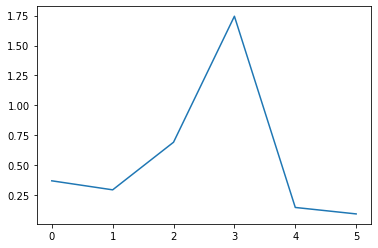

Epoch,5
Train loss,0.09274
validation loss,0.34676
Validation Acc,78.0
_runtime,1507
_timestamp,1618205413
_step,5


Epoch,▁▂▄▅▇█
Train loss,▂▂▄█▁▁
validation loss,▃▅▄█▇▁
Validation Acc,▁▃▆▂▇█
_runtime,▁▂▄▅▇█
_timestamp,▁▂▄▅▇█
_step,▁▂▄▅▇█


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [ ]:
wandb.agent(sweep_id2,train)

In [ ]:
sweep_config={
    "name":"Assignment2Q3_final",
    "method":"grid",
    "metric":{
        'name':'accuracy',
        'goal' : 'maximize'
    },
    "parameters":{
      "model_type":{
          "values":['Resnet50','GoogleNet','Inception_Resnet_V2','Inception_V3']
      },
      "Freezing_type":{
          "values":['Activating last layers']
      },
      "layer_number":{
          "values":[3]
      }

    }
}

In [ ]:
sweep_id3=wandb.sweep(sweep_config,entity="siddharth",project="Assignment2Q3_final")

Create sweep with ID: ijsy3lbn
Sweep URL: https://wandb.ai/siddharth/Assignment2Q3_final/sweeps/ijsy3lbn


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: vxvf5o8v with config:
wandb: 	Freezing_type: Activating last layers
wandb: 	layer_number: 3
wandb: 	model_type: Resnet50


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth



Iteration : 0563 , Loss:2.40 
Iteration : 100563 , Loss:1.36 
Iteration : 200563 , Loss:0.85 
Iteration : 300563 , Loss:1.31 
Iteration : 400563 , Loss:0.93 
Iteration : 500563 , Loss:1.02 
epoch: 0/6,Validation_acc:67.90
Iteration : 0563 , Loss:1.33 
Iteration : 100563 , Loss:0.58 
Iteration : 200563 , Loss:0.76 
Iteration : 300563 , Loss:1.96 
Iteration : 400563 , Loss:1.06 
Iteration : 500563 , Loss:1.09 
epoch: 1/6,Validation_acc:67.80
Iteration : 0563 , Loss:0.93 
Iteration : 100563 , Loss:1.08 
Iteration : 200563 , Loss:1.06 
Iteration : 300563 , Loss:0.84 
Iteration : 400563 , Loss:0.79 
Iteration : 500563 , Loss:0.82 
epoch: 2/6,Validation_acc:72.10
Iteration : 0563 , Loss:1.04 
Iteration : 100563 , Loss:1.41 
Iteration : 200563 , Loss:0.97 
Iteration : 300563 , Loss:1.17 
Iteration : 400563 , Loss:0.54 
Iteration : 500563 , Loss:0.69 
epoch: 3/6,Validation_acc:72.30
Iteration : 0563 , Loss:0.79 
Iteration : 100563 , Loss:0.75 
Iteration : 200563 , Loss:0.57 
Iteration : 30056

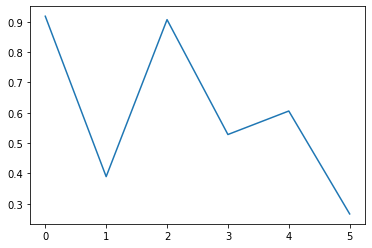

Epoch,5
Train loss,0.26653
validation loss,1.38202
Validation Acc,71.8
_runtime,1364
_timestamp,1618206840
_step,5


Epoch,▁▂▄▅▇█
Train loss,█▂█▄▅▁
validation loss,▂▁▄▇▇█
Validation Acc,▅▁▅▇▆█
_runtime,▁▂▄▅▇█
_timestamp,▁▂▄▅▇█
_step,▁▂▄▅▇█


wandb: Agent Starting Run: 56moctlf with config:
wandb: 	Freezing_type: Activating last layers
wandb: 	layer_number: 3
wandb: 	model_type: GoogleNet


Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth



Loaded pretrained weights for googlenet
Iteration : 0563 , Loss:2.18 
Iteration : 100563 , Loss:2.01 
Iteration : 200563 , Loss:1.74 
Iteration : 300563 , Loss:1.10 
Iteration : 400563 , Loss:1.39 
Iteration : 500563 , Loss:1.52 
epoch: 0/6,Validation_acc:60.10
Iteration : 0563 , Loss:1.44 
Iteration : 100563 , Loss:0.96 
Iteration : 200563 , Loss:1.06 
Iteration : 300563 , Loss:0.90 
Iteration : 400563 , Loss:1.51 
Iteration : 500563 , Loss:1.03 
epoch: 1/6,Validation_acc:62.10
Iteration : 0563 , Loss:0.87 
Iteration : 100563 , Loss:0.99 
Iteration : 200563 , Loss:1.02 
Iteration : 300563 , Loss:1.00 
Iteration : 400563 , Loss:0.92 
Iteration : 500563 , Loss:0.91 
epoch: 2/6,Validation_acc:61.40
Iteration : 0563 , Loss:1.67 
Iteration : 100563 , Loss:1.10 
Iteration : 200563 , Loss:1.08 
Iteration : 300563 , Loss:1.43 
Iteration : 400563 , Loss:0.67 
Iteration : 500563 , Loss:0.95 
epoch: 3/6,Validation_acc:64.90
Iteration : 0563 , Loss:1.06 
Iteration : 100563 , Loss:1.07 
Iteration

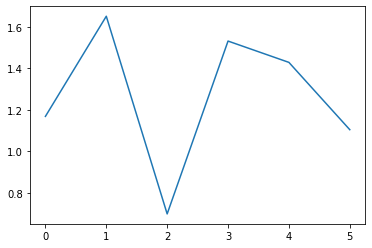

Epoch,5
Train loss,1.10374
validation loss,1.55312
Validation Acc,63.2
_runtime,1204
_timestamp,1618208072
_step,5


Epoch,▁▂▄▅▇█
Train loss,▄█▁▇▆▄
validation loss,▅▁▁▄▃█
Validation Acc,▁▇▅▇█▅
_runtime,▁▂▄▅▇█
_timestamp,▁▂▄▅▇█
_step,▁▂▄▅▇█


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: y8c2iqac with config:
wandb: 	Freezing_type: Activating last layers
wandb: 	layer_number: 3
wandb: 	model_type: Inception_Resnet_V2


Downloading: "http://data.lip6.fr/cadene/pretrainedmodels/inceptionresnetv2-520b38e4.pth" to /root/.cache/torch/hub/checkpoints/inceptionresnetv2-520b38e4.pth



Iteration : 0563 , Loss:2.33 
Iteration : 100563 , Loss:1.68 
Iteration : 200563 , Loss:1.15 
Iteration : 300563 , Loss:1.02 
Iteration : 400563 , Loss:0.68 
Iteration : 500563 , Loss:1.11 
epoch: 0/6,Validation_acc:76.20
Iteration : 0563 , Loss:0.90 
Iteration : 100563 , Loss:0.98 
Iteration : 200563 , Loss:1.06 
Iteration : 300563 , Loss:1.18 
Iteration : 400563 , Loss:0.77 
Iteration : 500563 , Loss:1.12 
epoch: 1/6,Validation_acc:76.70
Iteration : 0563 , Loss:0.60 
Iteration : 100563 , Loss:1.00 
Iteration : 200563 , Loss:0.70 
Iteration : 300563 , Loss:0.66 
Iteration : 400563 , Loss:1.26 
Iteration : 500563 , Loss:1.03 
epoch: 2/6,Validation_acc:78.00
Iteration : 0563 , Loss:0.96 
Iteration : 100563 , Loss:0.81 
Iteration : 200563 , Loss:0.85 
Iteration : 300563 , Loss:0.74 
Iteration : 400563 , Loss:1.21 
Iteration : 500563 , Loss:0.90 
epoch: 3/6,Validation_acc:76.00
Iteration : 0563 , Loss:0.97 
Iteration : 100563 , Loss:1.28 
Iteration : 200563 , Loss:0.37 
Iteration : 30056

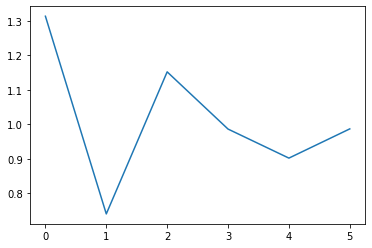

Epoch,5
Train loss,0.98722
validation loss,0.64077
Validation Acc,77.6
_runtime,2531
_timestamp,1618210637
_step,5


Epoch,▁▂▄▅▇█
Train loss,█▁▆▄▃▄
validation loss,▇▄▁▂▆█
Validation Acc,▁▃▆█▇▆
_runtime,▁▂▄▅▇█
_timestamp,▁▂▄▅▇█
_step,▁▂▄▅▇█


wandb: Agent Starting Run: vc7i9f32 with config:
wandb: 	Freezing_type: Activating last layers
wandb: 	layer_number: 3
wandb: 	model_type: Inception_V3


Iteration : 0563 , Loss:2.39 
Iteration : 100563 , Loss:1.82 
Iteration : 200563 , Loss:1.23 
Iteration : 300563 , Loss:1.30 
Iteration : 400563 , Loss:1.33 
Iteration : 500563 , Loss:1.24 
epoch: 0/6,Validation_acc:66.80
Iteration : 0563 , Loss:0.87 
Iteration : 100563 , Loss:0.69 
Iteration : 200563 , Loss:1.19 
Iteration : 300563 , Loss:0.93 
Iteration : 400563 , Loss:0.63 
Iteration : 500563 , Loss:0.84 
epoch: 1/6,Validation_acc:70.00
Iteration : 0563 , Loss:0.81 
Iteration : 100563 , Loss:0.90 
Iteration : 200563 , Loss:1.00 
Iteration : 300563 , Loss:1.31 
Iteration : 400563 , Loss:1.00 
Iteration : 500563 , Loss:0.49 
epoch: 2/6,Validation_acc:70.20
Iteration : 0563 , Loss:0.70 
Iteration : 100563 , Loss:1.44 
Iteration : 200563 , Loss:1.22 
Iteration : 300563 , Loss:2.14 
Iteration : 400563 , Loss:1.05 
Iteration : 500563 , Loss:0.37 
epoch: 3/6,Validation_acc:67.50
Iteration : 0563 , Loss:0.91 
Iteration : 100563 , Loss:1.10 
Iteration : 200563 , Loss:0.80 
Iteration : 300563

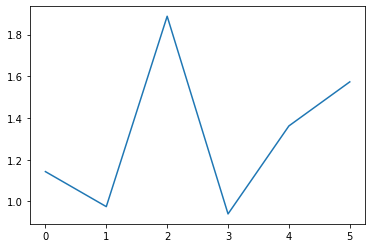

Epoch,5
Train loss,1.57311
validation loss,0.61324
Validation Acc,70.5
_runtime,1440
_timestamp,1618212114
_step,5


Epoch,▁▂▄▅▇█
Train loss,▂▁█▁▄▆
validation loss,▂█▁▇▃▂
Validation Acc,▁▅▇▄██
_runtime,▁▂▄▅▇█
_timestamp,▁▂▄▅▇█
_step,▁▂▄▅▇█


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [ ]:
wandb.agent(sweep_id3,train)

#ResNet50

In [ ]:
resnt=models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
print(resnt)

In [ ]:
num_classes=10

In [ ]:
for param in resnt.parameters():
  param.requires_grad=False

In [ ]:
resnt.fc.out_features

1000

In [ ]:
final_in_features=resnt.fc.in_features
resnt.fc=nn.Linear(final_in_features,num_classes)

In [ ]:
print(resnt)

In [ ]:
for param in resnt.parameters():

  if(param.requires_grad):
    
    print(param.shape)

torch.Size([10, 2048])
torch.Size([10])


In [ ]:
resnt=resnt.to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(resnt.parameters(),lr=0.001)

In [ ]:
def Evaluation(dataloader,model):
  total,correct=0,0
  for data in dataloader:
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    outputs=model(inputs)
    _,pred=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(pred==labels).sum().item()
  return 100*correct/total





In [ ]:
import copy

In [ ]:
#%%time


loss_epoch_arr=[]
max_epochs=5

n_iter=np.ceil(8999/batch_size)
min_loss=1000


for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    opt.zero_grad()
    outputs=resnt(inputs) #forwrd_pass
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step() #Update the parameter after the backward paas using opt optimiser
    if(min_loss>loss.item()):
      min_loss=loss.item()
      best_model=copy.deepcopy(resnt.state_dict())
      print("Min Loss is %.2f" % min_loss)

    del inputs,labels,outputs
    torch.cuda.empty_cache()

    if(i%100==0):
      print("Iteration : %d%d , Loss:%0.2f " %(i,n_iter,loss.item()))




   # loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())


  print("epoch: %d/%d,Train_acc:%.2f,Test_acc:%.2f" % (epoch,max_epochs,Evaluation(trainloader,resnt),Evaluation(testloader,resnt)))


plt.plot(loss_epoch_arr)
plt.show()

  





In [ ]:
inception=models.(pretrained=True)

In [ ]:
model_ft = models.resnet50(pretrained=True)
for param in model_ft.parameters():
  param.requires_grad=False
ct = 0
for child in model_ft.children():
  ct += 1
  if ct > 6:
    for param in child.parameters():
      param.requires_grad = True
      print(param.requires_grad,ct)

In [ ]:
for param in model_ft.parameters():

  if(param.requires_grad):
    
    print(param.shape)

In [ ]:
final_in_features=model_ft.fc.in_features
model_ft.fc=nn.Linear(final_in_features,num_classes)

In [ ]:
model_ft

In [ ]:
model_ft=model_ft.to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(model_ft.parameters(),lr=0.001,momentum=0.9)

In [ ]:
%%time


loss_epoch_arr=[]
max_epochs=10
batch_size=128
n_iter=np.ceil(8999/batch_size)
min_loss=1000


for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    opt.zero_grad()
    outputs=model_ft(inputs) #forwrd_pass
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step() #Update the parameter after the backward paas using opt optimiser
    if(min_loss>loss.item()):
      min_loss=loss.item()
      best_model=copy.deepcopy(model_ft.state_dict())
      print("Min Loss is %.2f" % min_loss)

    del inputs,labels,outputs
    torch.cuda.empty_cache()

    if(i%100==0):
      print("Iteration : %d%d , Loss:%0.2f " %(i,n_iter,loss.item()))




   # loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())


  print("epoch: %d/%d,Test_acc:%.2f" % (epoch,max_epochs,Evaluation(testloader,model_ft)))


plt.plot(loss_epoch_arr)
plt.show()

  





In [ ]:
Evaluation(testloader,model_ft)

72.8

In [ ]:
model_ft = models.resnet50(pretrained=True)
for param in model_ft.parameters():
  param.requires_grad=False
ct = 0
for child in model_ft.children():
  ct += 1
  if ct < 5:
    for param in child.parameters():
      param.requires_grad = True
      #print(ct)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
for param in model_ft.parameters():

  if(param.requires_grad):
    
    print(param.shape)

In [ ]:
num_classes=10
final_in_features=model_ft.fc.in_features
model_ft.fc=nn.Linear(final_in_features,num_classes)

In [ ]:
model_ft=model_ft.to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(model_ft.parameters(),lr=0.001,momentum=0.9)

In [ ]:
del model_ft

Iteration : 0563 , Loss:2.31 
Iteration : 100563 , Loss:1.09 
Iteration : 200563 , Loss:0.92 
Iteration : 300563 , Loss:1.56 
Iteration : 400563 , Loss:1.30 
Iteration : 500563 , Loss:0.51 
epoch: 0/2,Test_acc:70.40
Iteration : 0563 , Loss:0.72 
Iteration : 100563 , Loss:0.63 
Iteration : 200563 , Loss:1.08 
Iteration : 300563 , Loss:0.79 
Iteration : 400563 , Loss:1.11 
Iteration : 500563 , Loss:0.84 
epoch: 1/2,Test_acc:69.90


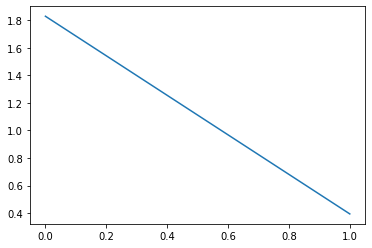

CPU times: user 8min 12s, sys: 4min 36s, total: 12min 48s
Wall time: 12min 47s


In [ ]:
%%time

batch_size=16
loss_epoch_arr=[]
max_epochs=2

n_iter=np.ceil(8999/batch_size)
min_loss=1000


for epoch in range(max_epochs):
  for i,data in enumerate(trainloader_1,0):
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    opt.zero_grad()
    outputs=model_ft(inputs) #forwrd_pass
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step() #Update the parameter after the backward paas using opt optimiser
    #if(min_loss>loss.item()):
      #min_loss=loss.item()
      #best_model=copy.deepcopy(model_ft.state_dict())
      #print("Min Loss is %.2f" % min_loss)

    del inputs,labels,outputs
    torch.cuda.empty_cache()

    if(i%100==0):
      print("Iteration : %d%d , Loss:%0.2f " %(i,n_iter,loss.item()))




   # loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())


  print("epoch: %d/%d,Test_acc:%.2f" % (epoch,max_epochs,Evaluation(validationloader_1,model_ft)))


plt.plot(loss_epoch_arr)
plt.show()

  





#InceptionV3



In [ ]:
model1=models.inception_v3(pretrained=True)

In [ ]:
print(model1)

In [ ]:
for param in model1.parameters():
  param.requires_grad=False


In [ ]:
for param in model1.parameters():

  if(param.requires_grad):
    
    print(param.shape)

In [ ]:
num_classes=10

In [ ]:
final_in_features=model1.fc.in_features
model1.fc=nn.Linear(final_in_features,num_classes)

In [ ]:
model1

In [ ]:
for param in model1.parameters():

  if(param.requires_grad):
    
    print(param.shape)

torch.Size([10, 2048])
torch.Size([10])


In [ ]:
model1=model1.to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(model1.parameters(),lr=0.001)

In [ ]:
model1.aux_logits=False

In [ ]:
#%%time


loss_epoch_arr=[]
max_epochs=3
batch_size=128
n_iter=np.ceil(8999/batch_size)
min_loss=1000


for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    opt.zero_grad()
    outputs=model1(inputs) #forwrd_pass
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step() #Update the parameter after the backward paas using opt optimiser
    if(min_loss>loss.item()):
      min_loss=loss.item()
      best_model=copy.deepcopy(model1.state_dict())
      print("Min Loss is %.2f" % min_loss)

    del inputs,labels,outputs
    torch.cuda.empty_cache()

    if(i%100==0):
      print("Iteration : %d%d , Loss:%0.2f " %(i,n_iter,loss.item()))




   # loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())


  print("epoch: %d/%d,Train_acc:%.2f,Test_acc:%.2f" % (epoch,max_epochs,Evaluation(trainloader,model1),Evaluation(testloader,model1)))


plt.plot(loss_epoch_arr)
plt.show()

  





RuntimeError: ignored

In [ ]:
model2=models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


In [ ]:
model2.aux_logits=False


In [ ]:
for param in model2.parameters():
  param.requires_grad=False

In [ ]:
#model2=models.inception_v3(pretrained=True)
k = 0
for child in model2.children():
  k += 1
  if k > 17:
    for param in child.parameters():
      param.requires_grad = True
      print(param.requires_grad,k)

In [ ]:
for param in model2.parameters():

  if(param.requires_grad):
    
    print(param.shape)

In [ ]:
model2

In [ ]:
final_in_features=model2.fc.in_features
model2.fc=nn.Linear(final_in_features,num_classes)

In [ ]:
model2=model2.to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(model2.parameters(),lr=0.001)

In [ ]:
#%%time


loss_epoch_arr=[]
max_epochs=2
batch_size=128
n_iter=np.ceil(8999/batch_size)
min_loss=1000


for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    opt.zero_grad()
    outputs=model2(inputs) #forwrd_pass
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step() #Update the parameter after the backward paas using opt optimiser
    if(min_loss>loss.item()):
      min_loss=loss.item()
      best_model=copy.deepcopy(model2.state_dict())
      print("Min Loss is %.2f" % min_loss)

    del inputs,labels,outputs
    torch.cuda.empty_cache()

    if(i%100==0):
      print("Iteration : %d%d , Loss:%0.2f " %(i,n_iter,loss.item()))




   # loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())


  print("epoch: %d/%d,Test_acc:%.2f" % (epoch,max_epochs,Evaluation(testloader,model2)))


plt.plot(loss_epoch_arr)
plt.show()

  





In [ ]:
model3=models.inception_v3(pretrained=True)
model3.aux_logits=False

In [ ]:
for param in model3.parameters():
  param.requires_grad=False

In [ ]:
k = 0
for child in model3.children():
  k += 1
  if k < 5:
    for param in child.parameters():
      param.requires_grad = True
      print (k)

1
1
1
2
2
2
3
3
3


In [ ]:
final_in_features=model3.fc.in_features
model3.fc=nn.Linear(final_in_features,num_classes)


In [ ]:
for param in model3.parameters():

  if(param.requires_grad):
    
    print(param.shape)

In [ ]:
model3=model3.to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(model3.parameters(),lr=0.001)

In [ ]:
#%%time


loss_epoch_arr=[]
max_epochs=10
batch_size=128
n_iter=np.ceil(8999/batch_size)
min_loss=1000


for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    opt.zero_grad()
    outputs=model3(inputs) #forwrd_pass
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step() #Update the parameter after the backward paas using opt optimiser
    if(min_loss>loss.item()):
      min_loss=loss.item()
      best_model=copy.deepcopy(model3.state_dict())
      print("Min Loss is %.2f" % min_loss)

    del inputs,labels,outputs
    torch.cuda.empty_cache()

    if(i%100==0):
      print("Iteration : %d%d , Loss:%0.2f " %(i,n_iter,loss.item()))




   # loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())


  print("epoch: %d/%d,Test_acc:%.2f" % (epoch,max_epochs,Evaluation(testloader,model3)))


plt.plot(loss_epoch_arr)
plt.show()

  





#GoogleNet

In [ ]:
from googlenet_pytorch import GoogLeNet 
model_1 = GoogLeNet.from_pretrained('googlenet')

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth



Loaded pretrained weights for googlenet


In [ ]:
#model_1=models.GoogLeNet(pretrained=True)
model_1.aux_logits=False

In [ ]:
for param in model_1.parameters():
  param.requires_grad=False

In [ ]:
for param in model_1.parameters():

  if(param.requires_grad):
    
    print(param.shape)

In [ ]:
final_in_features=model_1.fc.in_features
model_1.fc=nn.Linear(final_in_features,num_classes)

In [ ]:
model_1=model_1.to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(model_1.parameters(),lr=0.001)

Min Loss is 2.24
Iteration : 071 , Loss:2.24 
Min Loss is 2.20
Min Loss is 2.20
Min Loss is 2.19
Min Loss is 2.15
Min Loss is 2.14
Iteration : 10071 , Loss:2.24 
Min Loss is 2.11
Iteration : 20071 , Loss:2.26 
Min Loss is 2.05
Min Loss is 2.04
Iteration : 30071 , Loss:2.11 
Min Loss is 2.04
Min Loss is 2.01
Min Loss is 2.01
Iteration : 40071 , Loss:2.13 
Min Loss is 1.96
Min Loss is 1.80
Iteration : 50071 , Loss:2.01 
epoch: 0/2,Validation_acc:38.70
Iteration : 071 , Loss:2.13 
Iteration : 10071 , Loss:2.08 
Min Loss is 1.79
Iteration : 20071 , Loss:2.19 
Min Loss is 1.75
Min Loss is 1.69
Iteration : 30071 , Loss:2.06 
Min Loss is 1.67
Iteration : 40071 , Loss:1.87 
Min Loss is 1.64
Min Loss is 1.64
Iteration : 50071 , Loss:1.79 
Min Loss is 1.59
Min Loss is 1.52
epoch: 1/2,Validation_acc:52.80


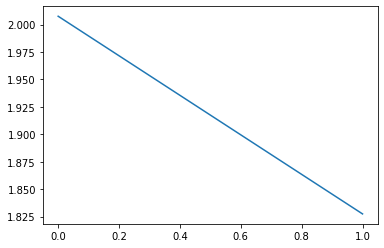

In [ ]:
#%%time


loss_epoch_arr=[]
max_epochs=2
batch_size=128
n_iter=np.ceil(8999/batch_size)
min_loss=1000


for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    opt.zero_grad()
    outputs=model_1(inputs) #forwrd_pass
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step() #Update the parameter after the backward paas using opt optimiser
    if(min_loss>loss.item()):
      min_loss=loss.item()
      best_model=copy.deepcopy(model_1.state_dict())
      print("Min Loss is %.2f" % min_loss)

    del inputs,labels,outputs
    torch.cuda.empty_cache()

    if(i%100==0):
      print("Iteration : %d%d , Loss:%0.2f " %(i,n_iter,loss.item()))




   # loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())


  print("epoch: %d/%d,Validation_acc:%.2f" % (epoch,max_epochs,Evaluation(testloader,model_1)))


plt.plot(loss_epoch_arr)
plt.show()

  





In [ ]:
model_2 = GoogLeNet.from_pretrained('googlenet')
model_2.aux_logits=False
for param in model_2.parameters():
  param.requires_grad=False

Loaded pretrained weights for googlenet


In [ ]:
#model2=models.inception_v3(pretrained=True)
k = 0
for child in model_2.children():
  k += 1
  if k > 16:
    for param in child.parameters():
      param.requires_grad = True
      print(param.requires_grad,k)

True 17
True 17
True 17
True 17
True 17
True 17
True 17
True 18
True 18
True 18
True 18
True 18
True 18
True 18
True 21
True 21


In [ ]:
for param in model_2.parameters():

  if(param.requires_grad):
    
    print(param.shape)

torch.Size([128, 512, 1, 1])
torch.Size([128])
torch.Size([128])
torch.Size([1024, 2048])
torch.Size([1024])
torch.Size([1000, 1024])
torch.Size([1000])
torch.Size([128, 528, 1, 1])
torch.Size([128])
torch.Size([128])
torch.Size([1024, 2048])
torch.Size([1024])
torch.Size([1000, 1024])
torch.Size([1000])
torch.Size([1000, 1024])
torch.Size([1000])


In [ ]:
final_in_features=model_2.fc.in_features
model_2.fc=nn.Linear(final_in_features,num_classes)

In [ ]:
model_2=model_2.to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(model_2.parameters(),lr=0.001)

Min Loss is 2.43
Iteration : 071 , Loss:2.43 
Min Loss is 2.33
Min Loss is 2.33
Min Loss is 2.32
Min Loss is 2.28
Min Loss is 2.26
Min Loss is 2.24
Min Loss is 2.22
Min Loss is 2.21
Min Loss is 2.20
Min Loss is 2.16
Iteration : 10071 , Loss:2.38 
Min Loss is 2.12
Min Loss is 2.12
Min Loss is 2.10
Min Loss is 2.09
Iteration : 20071 , Loss:2.25 
Min Loss is 2.07
Iteration : 30071 , Loss:2.28 
Min Loss is 2.04
Min Loss is 1.98
Iteration : 40071 , Loss:2.12 
Min Loss is 1.96
Iteration : 50071 , Loss:2.03 
Min Loss is 1.93
Min Loss is 1.92
epoch: 0/2,Validation_acc:37.20
Iteration : 071 , Loss:2.19 
Min Loss is 1.92
Min Loss is 1.89
Min Loss is 1.87
Min Loss is 1.84
Iteration : 10071 , Loss:1.85 
Min Loss is 1.79
Iteration : 20071 , Loss:2.05 
Min Loss is 1.75
Iteration : 30071 , Loss:2.00 
Min Loss is 1.75
Min Loss is 1.74
Min Loss is 1.73
Min Loss is 1.72
Iteration : 40071 , Loss:2.00 
Min Loss is 1.62
Iteration : 50071 , Loss:1.85 
epoch: 1/2,Validation_acc:50.90


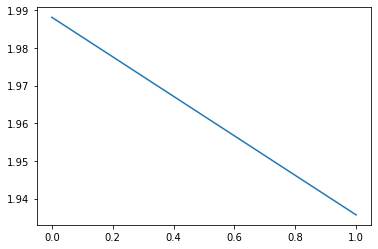

In [ ]:
#%%time


loss_epoch_arr=[]
max_epochs=2
batch_size=128
n_iter=np.ceil(8999/batch_size)
min_loss=1000


for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    opt.zero_grad()
    outputs=model_2(inputs) #forwrd_pass
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step() #Update the parameter after the backward paas using opt optimiser
    if(min_loss>loss.item()):
      min_loss=loss.item()
      best_model=copy.deepcopy(model_2.state_dict())
      print("Min Loss is %.2f" % min_loss)

    del inputs,labels,outputs
    torch.cuda.empty_cache()

    if(i%100==0):
      print("Iteration : %d%d , Loss:%0.2f " %(i,n_iter,loss.item()))




   # loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())


  print("epoch: %d/%d,Validation_acc:%.2f" % (epoch,max_epochs,Evaluation(testloader,model_2)))


plt.plot(loss_epoch_arr)
plt.show()

  





In [ ]:
model_3 = GoogLeNet.from_pretrained('googlenet')
model_3.aux_logits=False
for param in model_3.parameters():
  param.requires_grad=False

Loaded pretrained weights for googlenet


In [ ]:
#model2=models.inception_v3(pretrained=True)
k = 0
for child in model_3.children():
  k += 1
  if k < 6:
    for param in child.parameters():
      param.requires_grad = True
      print(param.requires_grad,k)

True 1
True 1
True 1
True 3
True 3
True 3
True 4
True 4
True 4


In [ ]:
for param in model_3.parameters():

  if(param.requires_grad):
    
    print(param.shape)

torch.Size([64, 3, 7, 7])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 1, 1])
torch.Size([64])
torch.Size([64])
torch.Size([192, 64, 3, 3])
torch.Size([192])
torch.Size([192])


In [ ]:
final_in_features=model_3.fc.in_features
model_3.fc=nn.Linear(final_in_features,num_classes)

In [ ]:
model_3=model_3.to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(model_3.parameters(),lr=0.001)

Min Loss is 2.38
Iteration : 071 , Loss:2.38 
Min Loss is 2.33
Min Loss is 2.31
Min Loss is 2.26
Min Loss is 2.23
Min Loss is 2.21
Min Loss is 2.16
Min Loss is 2.16
Min Loss is 2.15
Iteration : 10071 , Loss:2.31 
Min Loss is 2.12
Min Loss is 2.09
Iteration : 20071 , Loss:2.20 
Min Loss is 2.08
Min Loss is 2.06
Iteration : 30071 , Loss:2.10 
Min Loss is 2.06
Min Loss is 1.99
Iteration : 40071 , Loss:2.07 
Min Loss is 1.98
Min Loss is 1.98
Min Loss is 1.96
Min Loss is 1.93
Iteration : 50071 , Loss:2.02 
Min Loss is 1.93
Min Loss is 1.91
epoch: 0/2,Validation_acc:44.50
Iteration : 071 , Loss:2.08 
Min Loss is 1.91
Min Loss is 1.85
Min Loss is 1.82
Iteration : 10071 , Loss:1.96 
Min Loss is 1.81
Min Loss is 1.81
Min Loss is 1.81
Iteration : 20071 , Loss:1.91 
Min Loss is 1.78
Min Loss is 1.76
Iteration : 30071 , Loss:2.04 
Min Loss is 1.76
Min Loss is 1.72
Min Loss is 1.68
Iteration : 40071 , Loss:1.96 
Min Loss is 1.68
Min Loss is 1.67
Iteration : 50071 , Loss:1.85 
Min Loss is 1.66
epoch

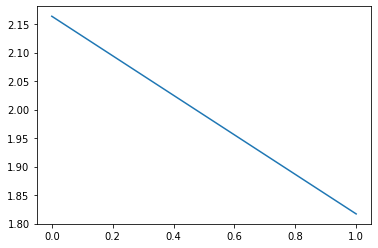

In [ ]:
#%%time


loss_epoch_arr=[]
max_epochs=2
batch_size=128
n_iter=np.ceil(8999/batch_size)
min_loss=1000


for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    opt.zero_grad()
    outputs=model_3(inputs) #forwrd_pass
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step() #Update the parameter after the backward paas using opt optimiser
    if(min_loss>loss.item()):
      min_loss=loss.item()
      best_model=copy.deepcopy(model_3.state_dict())
      print("Min Loss is %.2f" % min_loss)

    del inputs,labels,outputs
    torch.cuda.empty_cache()

    if(i%100==0):
      print("Iteration : %d%d , Loss:%0.2f " %(i,n_iter,loss.item()))




   # loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())


  print("epoch: %d/%d,Validation_acc:%.2f" % (epoch,max_epochs,Evaluation(testloader,model_3)))


plt.plot(loss_epoch_arr)
plt.show()

  





#InceptionResnetv2

In [ ]:
model_Inception_1=inceptionresnetv2(pretrained=True)

In [ ]:
model_Inception_1.aux_logits=False


In [ ]:
for param in model_Inception_1.parameters():
  param.requires_grad=False

In [ ]:
for param in model_Inception_1.parameters():

  if(param.requires_grad):
    
    print(param.shape)

torch.Size([10, 1536])
torch.Size([10])


In [ ]:
model_Inception_1

In [ ]:
final_in_features=model_Inception_1.classifier.in_features
model_Inception_1.classifier=nn.Linear(final_in_features,num_classes)

In [ ]:
model_Inception_1=model_Inception_1.to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(model_Inception_1.parameters(),lr=0.001)

Min Loss is 2.30
Iteration : 071 , Loss:2.30 
Min Loss is 2.28
Min Loss is 2.26
Min Loss is 2.22
Min Loss is 2.21
Min Loss is 2.15
Min Loss is 2.12
Min Loss is 2.12
Min Loss is 2.11
Iteration : 10071 , Loss:2.17 
Min Loss is 2.08
Min Loss is 1.98
Iteration : 20071 , Loss:2.13 
Min Loss is 1.98
Min Loss is 1.95
Min Loss is 1.90
Iteration : 30071 , Loss:2.08 
Min Loss is 1.87
Min Loss is 1.86
Min Loss is 1.82
Min Loss is 1.80
Min Loss is 1.78
Iteration : 40071 , Loss:1.97 
Min Loss is 1.77
Min Loss is 1.70
Iteration : 50071 , Loss:1.85 
Min Loss is 1.64
Min Loss is 1.63
epoch: 0/2,Validation_acc:56.10
Iteration : 071 , Loss:2.04 
Min Loss is 1.62
Min Loss is 1.61
Min Loss is 1.45
Iteration : 10071 , Loss:1.87 
Iteration : 20071 , Loss:1.51 
Min Loss is 1.44
Min Loss is 1.41
Iteration : 30071 , Loss:1.71 
Min Loss is 1.34
Min Loss is 1.34
Min Loss is 1.32
Iteration : 40071 , Loss:1.61 
Iteration : 50071 , Loss:1.73 
Min Loss is 1.30
epoch: 1/2,Validation_acc:63.50


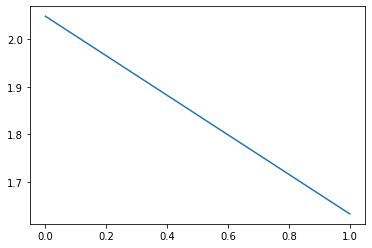

In [ ]:
#%%time


loss_epoch_arr=[]
max_epochs=2
batch_size=128
n_iter=np.ceil(8999/batch_size)
min_loss=1000


for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    opt.zero_grad()
    outputs=model_Inception_1(inputs) #forwrd_pass
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step() #Update the parameter after the backward paas using opt optimiser
    if(min_loss>loss.item()):
      min_loss=loss.item()
      best_model=copy.deepcopy(model_Inception_1.state_dict())
      print("Min Loss is %.2f" % min_loss)

    del inputs,labels,outputs
    torch.cuda.empty_cache()

    if(i%100==0):
      print("Iteration : %d%d , Loss:%0.2f " %(i,n_iter,loss.item()))




   # loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())


  print("epoch: %d/%d,Validation_acc:%.2f" % (epoch,max_epochs,Evaluation(testloader,model_Inception_1)))


plt.plot(loss_epoch_arr)
plt.show()

  





In [ ]:
model_Inception_2=inceptionresnetv2(pretrained=True)
model_Inception_2.aux_logits=False
for param in model_Inception_2.parameters():
  param.requires_grad=False

In [ ]:
#model2=models.inception_v3(pretrained=True)
k = 0
for child in model_Inception_2.children():
  k += 1
  if k > 13:
    for param in child.parameters():
      param.requires_grad = True
      print(param.requires_grad,k)

True 14
True 14
True 14
True 14
True 14
True 14
True 14
True 14
True 14
True 14
True 14
True 14
True 14
True 14
True 15
True 15
True 15
True 17
True 17


In [ ]:
for param in model_Inception_2.parameters():

  if(param.requires_grad):
    
    print(param.shape)

torch.Size([192, 2080, 1, 1])
torch.Size([192])
torch.Size([192])
torch.Size([192, 2080, 1, 1])
torch.Size([192])
torch.Size([192])
torch.Size([224, 192, 1, 3])
torch.Size([224])
torch.Size([224])
torch.Size([256, 224, 3, 1])
torch.Size([256])
torch.Size([256])
torch.Size([2080, 448, 1, 1])
torch.Size([2080])
torch.Size([1536, 2080, 1, 1])
torch.Size([1536])
torch.Size([1536])
torch.Size([10, 1536])
torch.Size([10])


In [ ]:
final_in_features=model_Inception_2.classifier.in_features
model_Inception_2.classifier=nn.Linear(final_in_features,num_classes)

In [ ]:
model_Inception_2=model_Inception_2.to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(model_Inception_2.parameters(),lr=0.001)

Min Loss is 2.35
Iteration : 071 , Loss:2.35 
Min Loss is 2.24
Min Loss is 2.22
Iteration : 10071 , Loss:2.28 
Min Loss is 2.21
Min Loss is 2.17
Iteration : 20071 , Loss:2.28 
Iteration : 30071 , Loss:2.29 
Iteration : 40071 , Loss:2.26 
Min Loss is 2.15
Iteration : 50071 , Loss:2.40 
epoch: 0/2,Validation_acc:9.10
Iteration : 071 , Loss:2.29 
Iteration : 10071 , Loss:2.37 
Iteration : 20071 , Loss:2.33 
Iteration : 30071 , Loss:2.27 
Iteration : 40071 , Loss:2.26 
Iteration : 50071 , Loss:2.28 
epoch: 1/2,Validation_acc:10.50


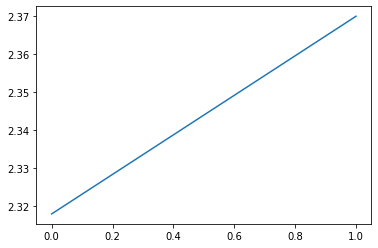

In [ ]:
#%%time


loss_epoch_arr=[]
max_epochs=2
batch_size=128
n_iter=np.ceil(8999/batch_size)
min_loss=1000


for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    opt.zero_grad()
    outputs=model_Inception_2(inputs) #forwrd_pass
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step() #Update the parameter after the backward paas using opt optimiser
    if(min_loss>loss.item()):
      min_loss=loss.item()
      best_model=copy.deepcopy(model_Inception_2.state_dict())
      print("Min Loss is %.2f" % min_loss)

    del inputs,labels,outputs
    torch.cuda.empty_cache()

    if(i%100==0):
      print("Iteration : %d%d , Loss:%0.2f " %(i,n_iter,loss.item()))




   # loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())


  print("epoch: %d/%d,Validation_acc:%.2f" % (epoch,max_epochs,Evaluation(testloader,model_Inception_2)))


plt.plot(loss_epoch_arr)
plt.show()

  





In [ ]:
model_Inception_3=inceptionresnetv2(pretrained=True)
model_Inception_3.aux_logits=False
for param in model_Inception_3.parameters():
  param.requires_grad=False

In [ ]:
#model2=models.inception_v3(pretrained=True)
k = 0
for child in model_Inception_3.children():
  k += 1
  if k < 5:
    for param in child.parameters():
      param.requires_grad = True
      print(param.requires_grad,k)

True 1
True 1
True 1
True 2
True 2
True 2
True 3
True 3
True 3


In [ ]:
for param in model_Inception_3.parameters():

  if(param.requires_grad):
    
    print(param.shape)

torch.Size([32, 3, 3, 3])
torch.Size([32])
torch.Size([32])
torch.Size([32, 32, 3, 3])
torch.Size([32])
torch.Size([32])
torch.Size([64, 32, 3, 3])
torch.Size([64])
torch.Size([64])


In [ ]:
final_in_features=model_Inception_3.classifier.in_features
model_Inception_3.classifier=nn.Linear(final_in_features,num_classes)

In [ ]:
model_Inception_3=model_Inception_3.to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(model_Inception_3.parameters(),lr=0.001)

Min Loss is 2.29
Iteration : 071 , Loss:2.29 
Min Loss is 2.26
Min Loss is 2.25
Min Loss is 2.22
Min Loss is 2.20
Min Loss is 2.15
Min Loss is 2.15
Min Loss is 2.04
Iteration : 10071 , Loss:2.15 
Min Loss is 2.01
Min Loss is 2.00
Iteration : 20071 , Loss:2.09 
Min Loss is 1.96
Min Loss is 1.96
Min Loss is 1.92
Min Loss is 1.91
Min Loss is 1.88
Iteration : 30071 , Loss:1.97 
Min Loss is 1.83
Min Loss is 1.83
Min Loss is 1.82
Min Loss is 1.79
Iteration : 40071 , Loss:1.90 
Min Loss is 1.78
Min Loss is 1.73
Iteration : 50071 , Loss:1.87 
Min Loss is 1.69
Min Loss is 1.58
epoch: 0/2,Validation_acc:55.40
Iteration : 071 , Loss:1.76 
Iteration : 10071 , Loss:1.77 
Min Loss is 1.55
Min Loss is 1.53
Min Loss is 1.49
Min Loss is 1.46
Min Loss is 1.41
Iteration : 20071 , Loss:1.41 
Min Loss is 1.33
Iteration : 30071 , Loss:1.61 
Iteration : 40071 , Loss:1.72 
Min Loss is 1.28
Min Loss is 1.28
Min Loss is 1.24
Iteration : 50071 , Loss:1.63 
epoch: 1/2,Validation_acc:65.20


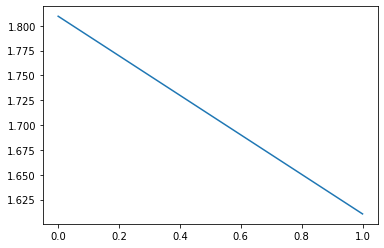

In [ ]:
#%%time


loss_epoch_arr=[]
max_epochs=2
batch_size=128
n_iter=np.ceil(8999/batch_size)
min_loss=1000


for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    opt.zero_grad()
    outputs=model_Inception_3(inputs) #forwrd_pass
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step() #Update the parameter after the backward paas using opt optimiser
    if(min_loss>loss.item()):
      min_loss=loss.item()
      best_model=copy.deepcopy(model_Inception_3.state_dict())
      print("Min Loss is %.2f" % min_loss)

    del inputs,labels,outputs
    torch.cuda.empty_cache()

    if(i%100==0):
      print("Iteration : %d%d , Loss:%0.2f " %(i,n_iter,loss.item()))




   # loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())


  print("epoch: %d/%d,Validation_acc:%.2f" % (epoch,max_epochs,Evaluation(testloader,model_Inception_3)))


plt.plot(loss_epoch_arr)
plt.show()

  



